### Regressão

#### Importando bibliotecas

In [2]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score

#### Leitura de dados

In [8]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [9]:
# Transformação do dataset em dataframe do Pandas, procedimento necessário por se tratar de um método de regressão
dataset = pd.DataFrame(diabetes_dataset.data, columns = diabetes_dataset.feature_names)

print(dataset.head(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [27]:
# Adição do target nesse dataframe
dataset['TARGET'] = diabetes_dataset.target

print(dataset.head(5))
print(dataset.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  
(442, 11)


#### Análise exploratória

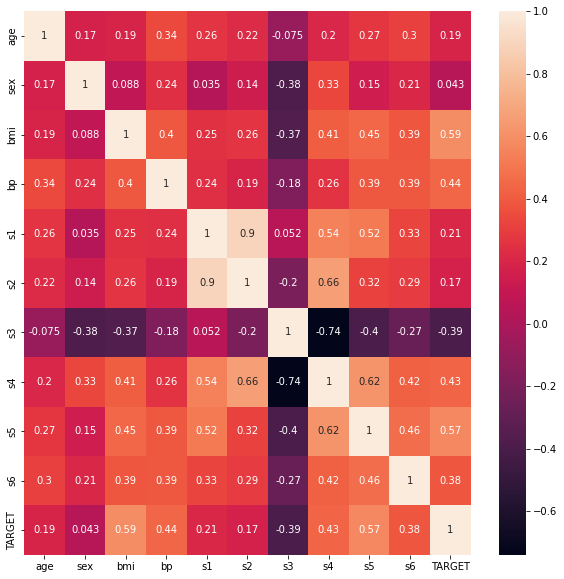

In [28]:
# Correlação
corr = dataset.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

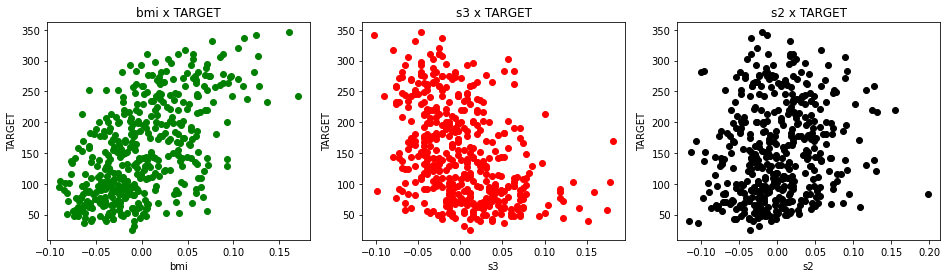

In [29]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(dataset["bmi"], dataset["TARGET"], color = "green")
plt.title("bmi x TARGET")
plt.xlabel("bmi")
plt.ylabel("TARGET")

plt.subplot(1,3,2)
plt.scatter(dataset["s3"], dataset["TARGET"], color = "red")
plt.title("s3 x TARGET")
plt.xlabel("s3")
plt.ylabel("TARGET")

plt.subplot(1,3,3)
plt.scatter(dataset["s2"], dataset["TARGET"], color = "black")
plt.title("s2 x TARGET")
plt.xlabel("s2")
plt.ylabel("TARGET")

plt.show()

#### Definição do modelo e treino

In [14]:
# instanciando modelos
tree = DecisionTreeRegressor()
linear = LinearRegression()
svm = SVR(kernel = 'linear')

In [39]:
# Separando dados
## Variáveis preditoras
X = dataset.iloc[:,0:10]
X = np.array(X)

## Variável alvo
y = dataset.iloc[:,10]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (309, 10)
Tamanho X de teste: (133, 10)
Tamanho y de treino: (309,)
Tamanho y de teste: (133,)


In [32]:
# Treinando modelos
tree.fit(X_train, y_train)

linear.fit(X_train, y_train)

svm.fit(X_train, y_train)

SVR(kernel='linear')

#### Testando e avaliando modelos

In [33]:
# Prevendo valores
tree_predict = tree.predict(X_test)

linear_predict = linear.predict(X_test)

svm_predict = svm.predict(X_test)

In [34]:
# Avaliação R2
tree_score = r2_score(y_test, tree_predict)
linear_score = r2_score(y_test, linear_predict)
svm_score = r2_score(y_test, svm_predict)

print(f"Pontuação R2 Decision Tree: {tree_score}")
print(f"Pontuação R2 Linear Regression: {linear_score}")
print(f"Pontuação R2 Support Vector Regressor: {svm_score}")

Pontuação R2 Decision Tree: -0.14020024893095973
Pontuação R2 Linear Regression: 0.3928939845074757
Pontuação R2 Support Vector Regressor: -0.01268427304708264


In [35]:
# Validação cruzada
tree_score_cv = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5)
linear_score_cv = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 5)
svm_score_cv = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 5)

print(f"Validação cruzada Decision Tree:{tree_score_cv.mean()}")
print(f"Validação cruzada Linear Regression:{linear_score_cv.mean()}")
print(f"Validação cruzada Support Vector Regressor:{svm_score_cv.mean()}")

Validação cruzada Decision Tree:-0.11766106261427685
Validação cruzada Linear Regression:0.5182872273824579
Validação cruzada Support Vector Regressor:-0.011543143203397088


In [36]:
# RMSE error
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predict))
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predict))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predict))

print(f"Pontuação R2 Decision Tree: {tree_rmse}")
print(f"Pontuação R2 Linear Regression: {linear_rmse}")
print(f"Pontuação R2 Support Vector Regressor: {svm_rmse}")

Pontuação R2 Decision Tree: 76.26743606881824
Pontuação R2 Linear Regression: 55.65200929335614
Pontuação R2 Support Vector Regressor: 71.87628361058121


In [37]:
# Results dataframe
results = pd.DataFrame()
results["Model"] = ["DecisionTree", "LinearRegression", "SupportVectRegressor"]
results["R2"] = [tree_score, linear_score, svm_score]
results["CV"] = [tree_score_cv.mean(), linear_score_cv.mean(), svm_score_cv.mean()]
results["RMSE"] = [tree_rmse, linear_rmse, svm_rmse]

results

,Model,R2,CV,RMSE
0,DecisionTree,-0.140200,-0.117661,76.267436
1,LinearRegression,0.392894,0.518287,55.652009
2,SupportVectRegressor,-0.012684,-0.011543,71.876284


#### Analisando predições

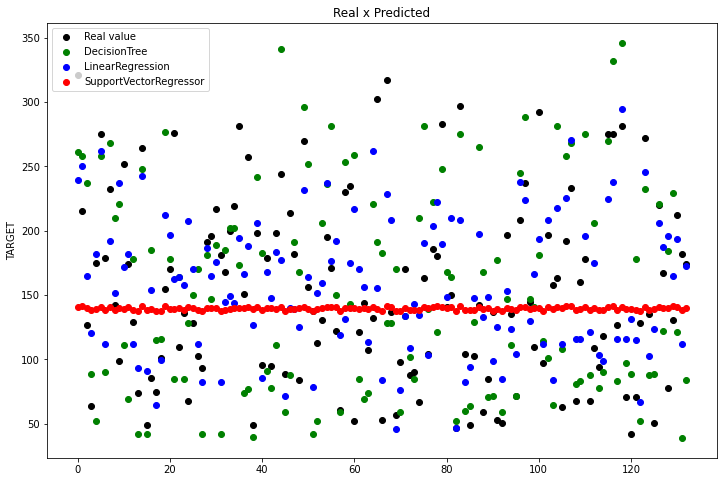

In [38]:
plt.figure(figsize=(12,8))

x_ = np.arange(len(y_test))

plt.scatter(x = x_, y = y_test, color = "black", label = "Real value")
plt.scatter(x = x_, y = tree_predict, color = "green", label = "DecisionTree")
plt.scatter(x = x_, y = linear_predict, color = "blue", label = "LinearRegression")
plt.scatter(x = x_, y = svm_predict, color = "red", label = "SupportVectorRegressor")

plt.legend()
plt.ylabel("TARGET")
plt.title("Real x Predicted")
plt.show()